In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
path=('/content/drive/My Drive/Election_Data.xlsx')

In [6]:
Xls = pd.ExcelFile(path)
Dict = pd.read_excel(Xls, 'Sheet1')
Dict

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [7]:
xls = pd.ExcelFile(path)
data = pd.read_excel(xls, 'Election_Dataset_Two Classes')

# **Exploratory Data Analysis**

In [ ]:
data.head()

,Serial Number,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
data.tail()

,Serial Number,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [ ]:
data.shape

(1525, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Serial Number            1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [ ]:
data.describe()

,Serial Number,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [ ]:
data.isnull().sum()

Serial Number              0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
data.dtypes

Serial Number               int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [ ]:
data.duplicated().sum()

0

In [10]:
data.drop(['Serial Number'], axis=1, inplace=True)
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


**Inference**
- The column “Serial Number : 0” is removed from the dataset before proceeding further as its insignificant for the analysis.
- There are 1525 rows and 9 columns
- Numerical Columns : age, economical_cond_national, economical_cond_household , Blair, Hague, Europe and political_knowledge.
- Non-Numerical Columns : vote and gender.
- There are no null or duplicated values in the given dataset

In [ ]:
#Let us know into the skewness of the data
data.skew()

<ipython-input-15-4b10b0967969>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [ ]:
# Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
# age have positive skewness where as other variales have negative skewness
# Blair is the column with maximum skewness out of all the columns

In [ ]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data['vote'].unique()

array(['Labour', 'Conservative'], dtype=object)

Since we know there are 2 unique values in vote and gender, lets separate the data based on this to understand the distribution or frequency of the values

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




**Inference:**
1. The population of female are greater than the males
2. Labour Party is the most voted party. There is a huge difference between the parties

## Outlier Detection, Univariate, Bivariate and Mutlivariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

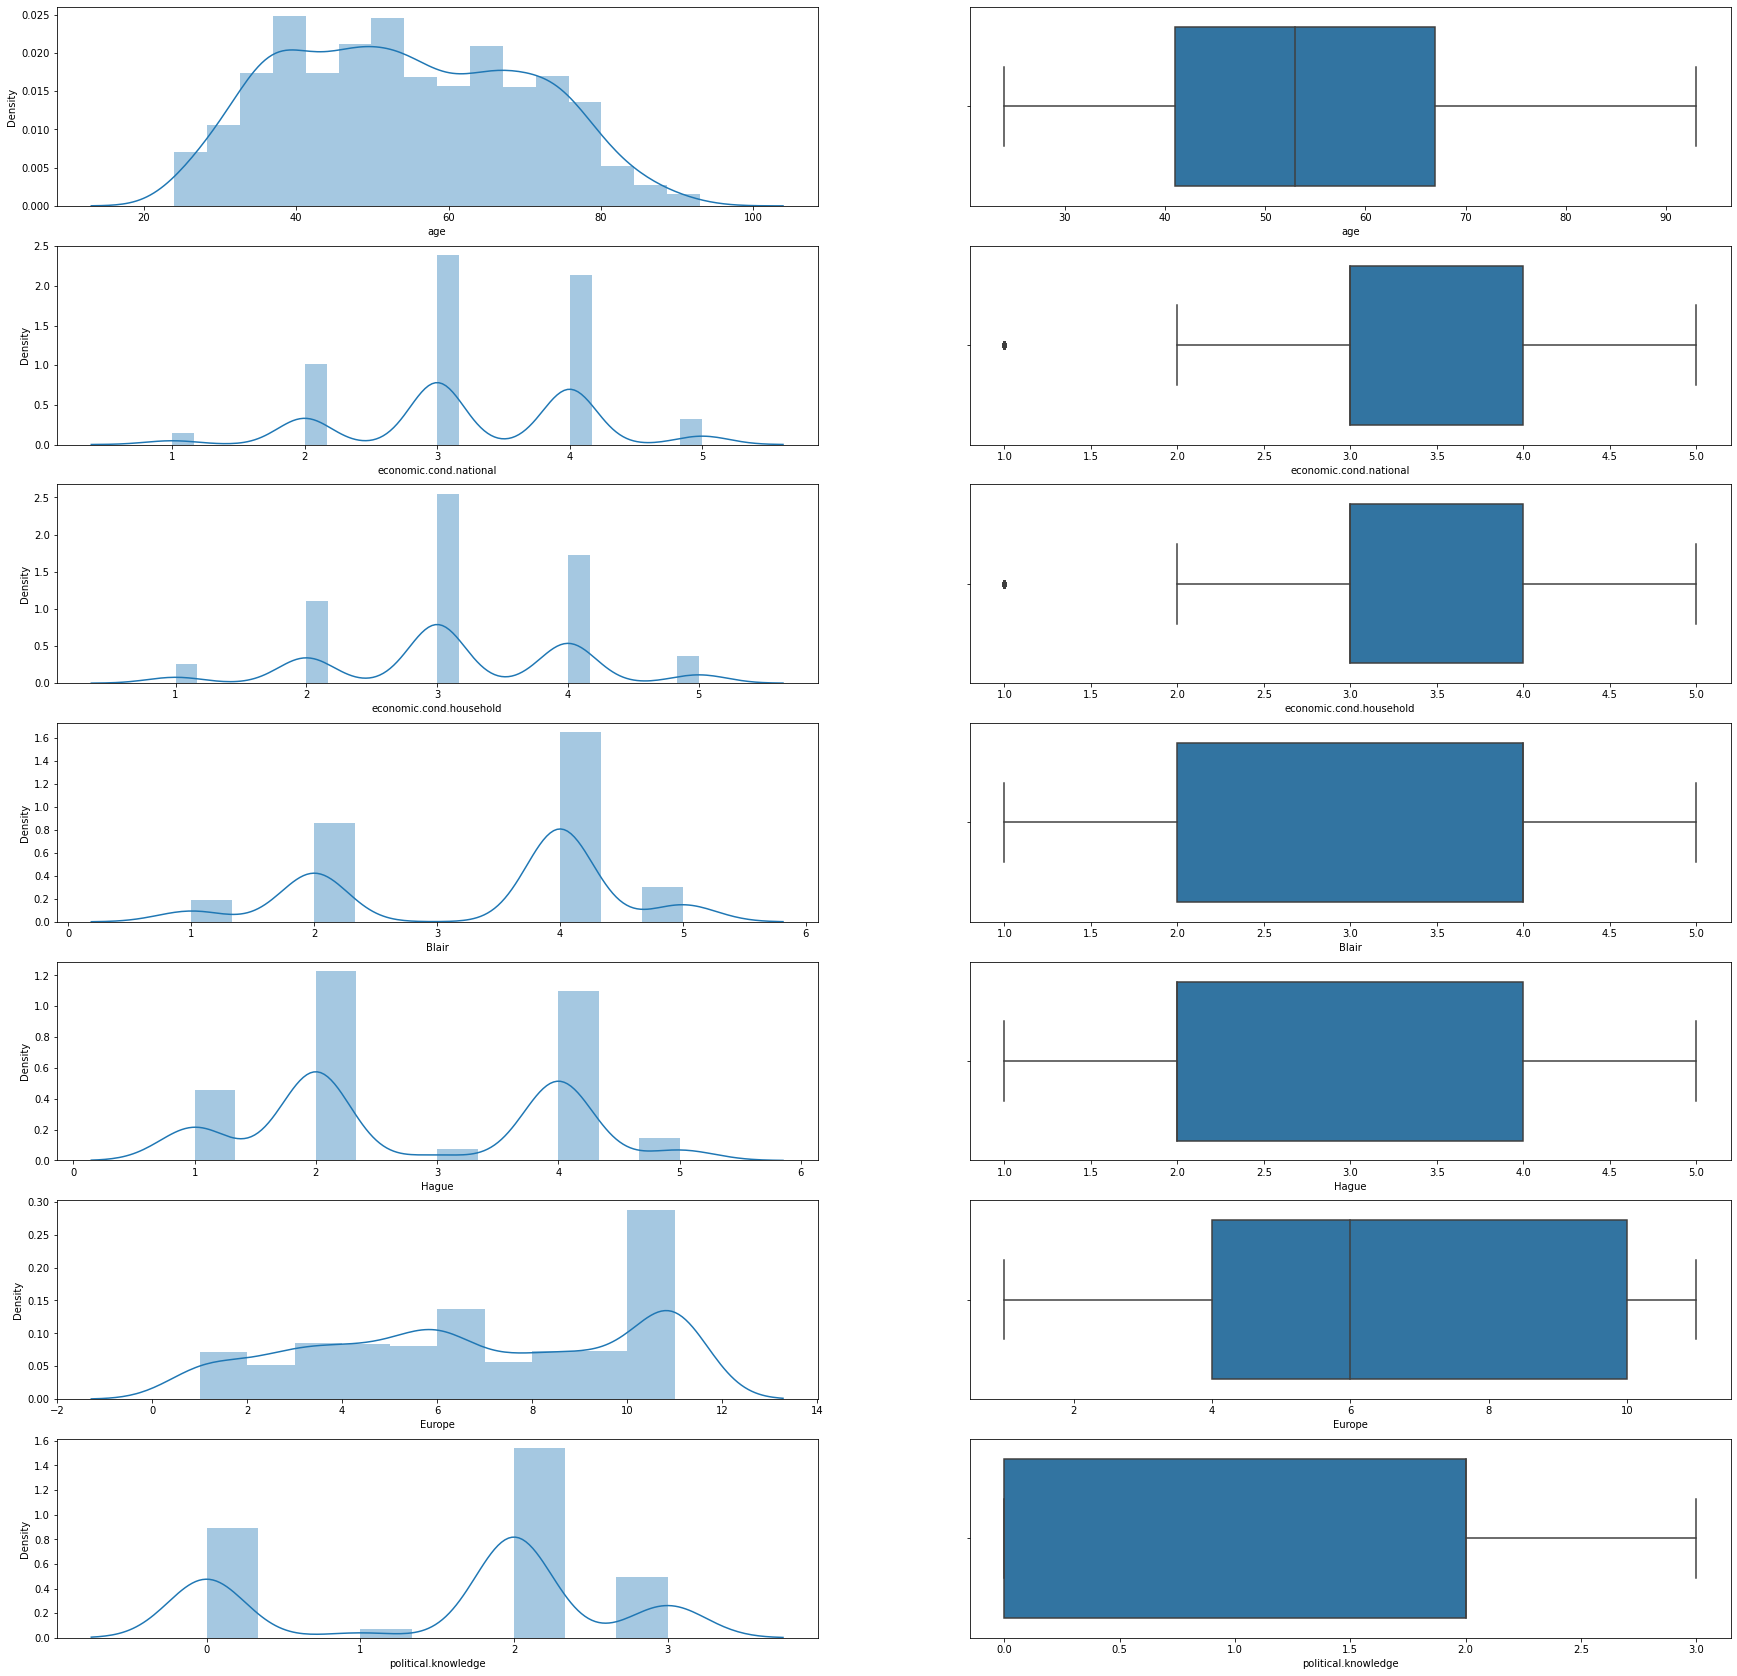

In [8]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(30,30)

sns.distplot(data['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=data, ax=axes[0][1])

sns.distplot(data['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=data , ax=axes[1][1])

sns.distplot(data['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=data, ax=axes[2][1])

sns.distplot(data['Blair'], kde=True, ax=axes[3][0])
sns.boxplot(x='Blair', data=data, ax=axes[3][1])

sns.distplot(data['Hague'] , kde=True, ax=axes[4][0])
sns.boxplot(x='Hague', data=data , ax=axes[4][1])

sns.distplot(data['Europe'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Europe', data=data , ax=axes[5][1])

sns.distplot(data['political.knowledge'], kde=True, ax=axes[6][0])
sns.boxplot(x='political.knowledge', data=data, ax=axes[6][1])

In [ ]:
# Age is normally distributed others are multi-modal skewness seen
# economic.cond.national and economic.cond.household have outliers

Text(0.5, 1.0, 'Distribution of age')

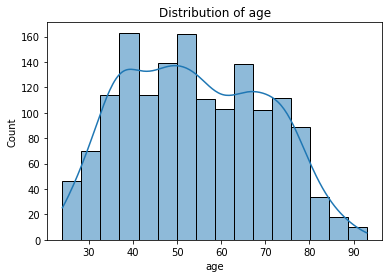

In [ ]:
sns.histplot(data=data, x='age', kde=True);
plt.title("Distribution of age")

female    0.532459
male      0.467541
Name: gender, dtype: float64


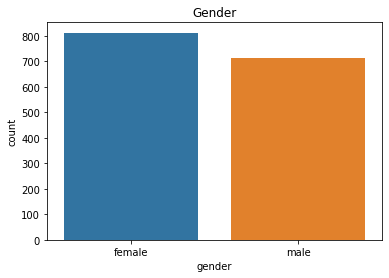

In [ ]:
sns.countplot(data=data, x='gender');
plt.title("Gender")
print(data.gender.value_counts(normalize=True))

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64


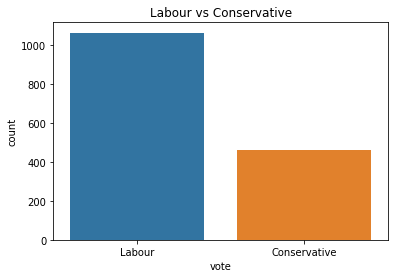

In [ ]:
sns.countplot(data=data, x='vote');
plt.title("Labour vs Conservative")
print(data.vote.value_counts(normalize=True))

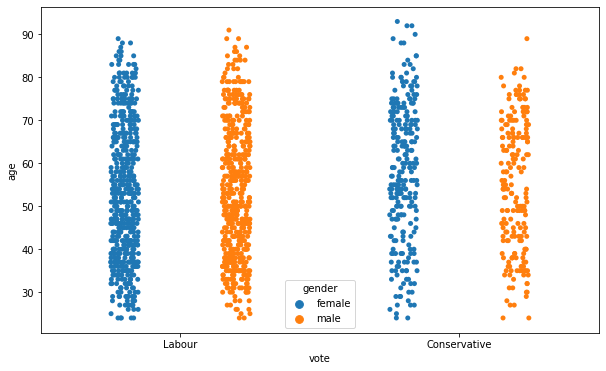

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(data=data, x='vote', y='age', hue= 'gender',dodge=True);

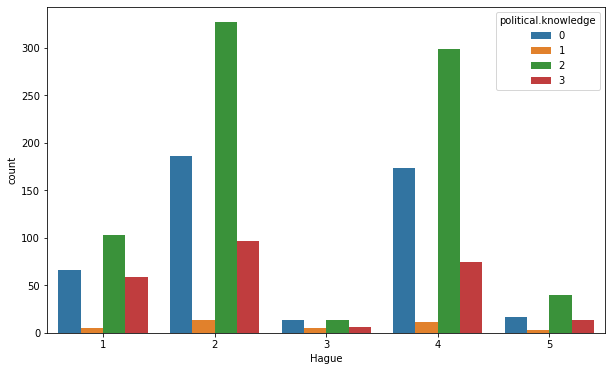

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Hague', hue= 'political.knowledge',dodge=True);

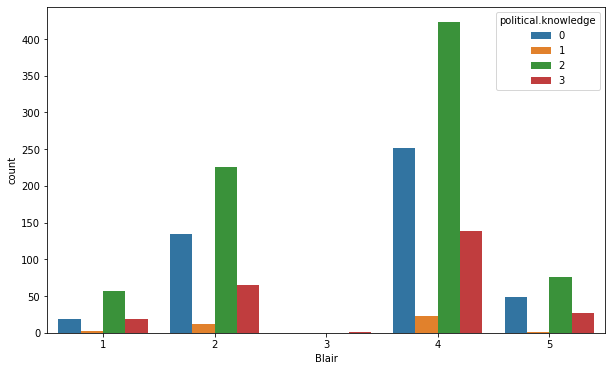

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Blair', hue= 'political.knowledge',dodge=True);

<Figure size 1440x1440 with 0 Axes>

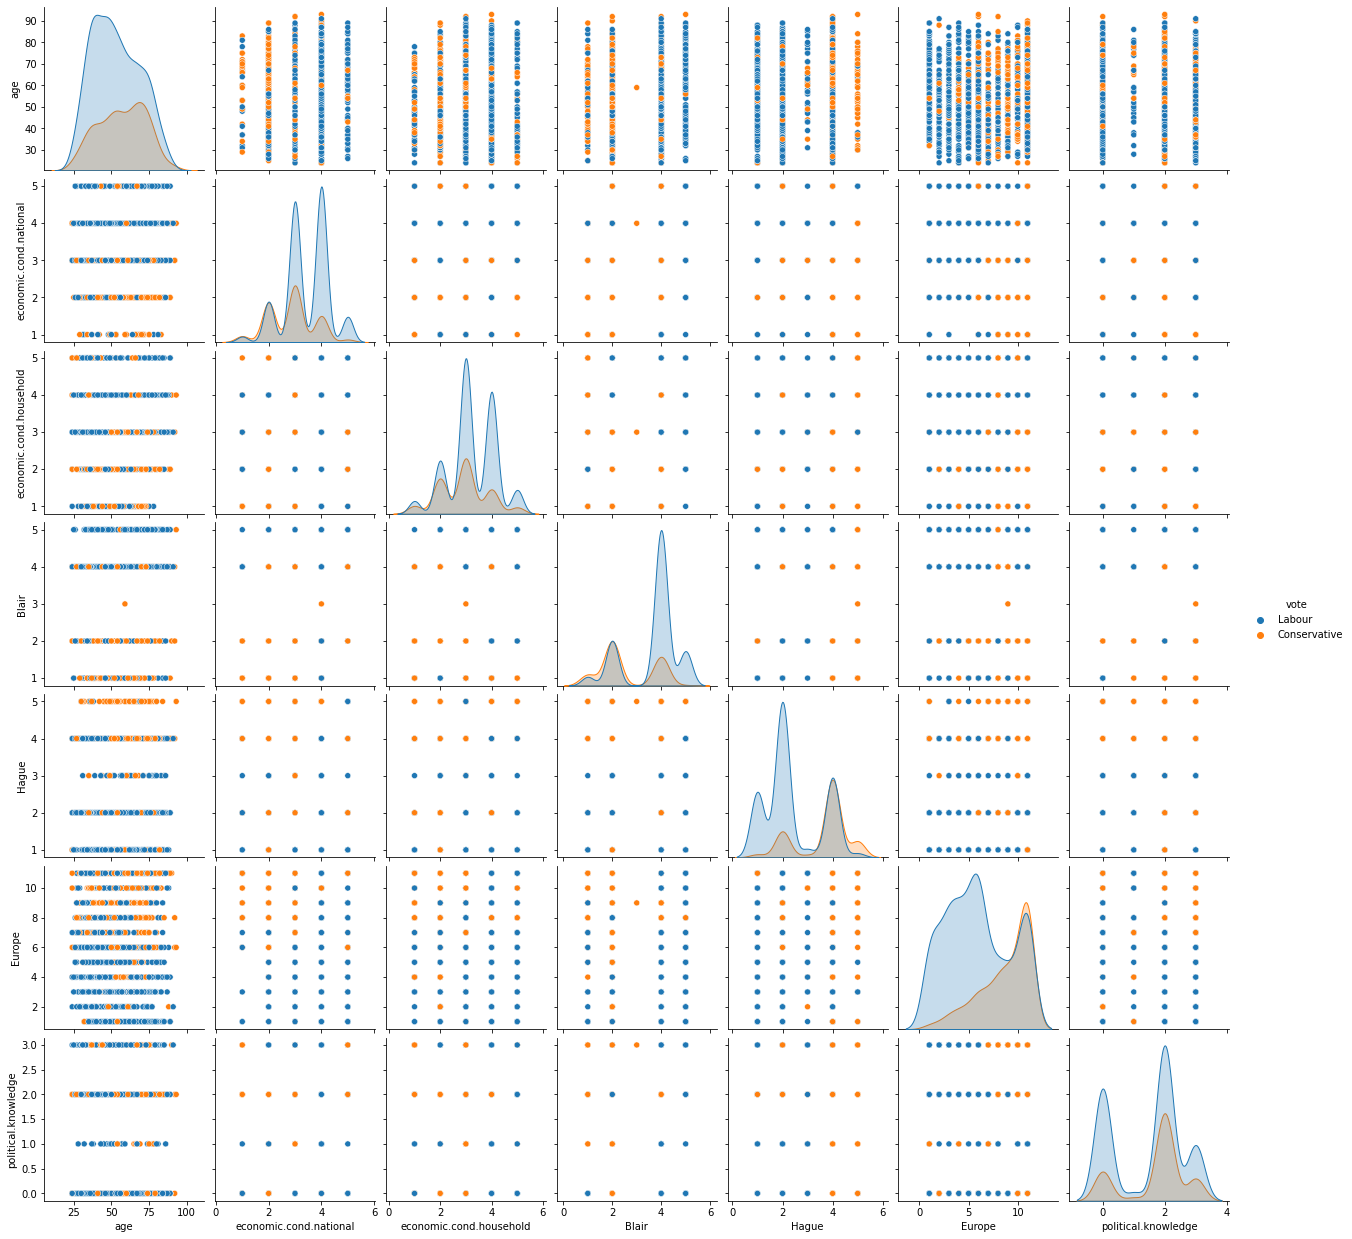

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data,diag_kind='kde', hue="vote");

From the Pairplot, we can use there are no noticable linear relationship between the variables.

But there seems to be some sort of exponential distribution among the columns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

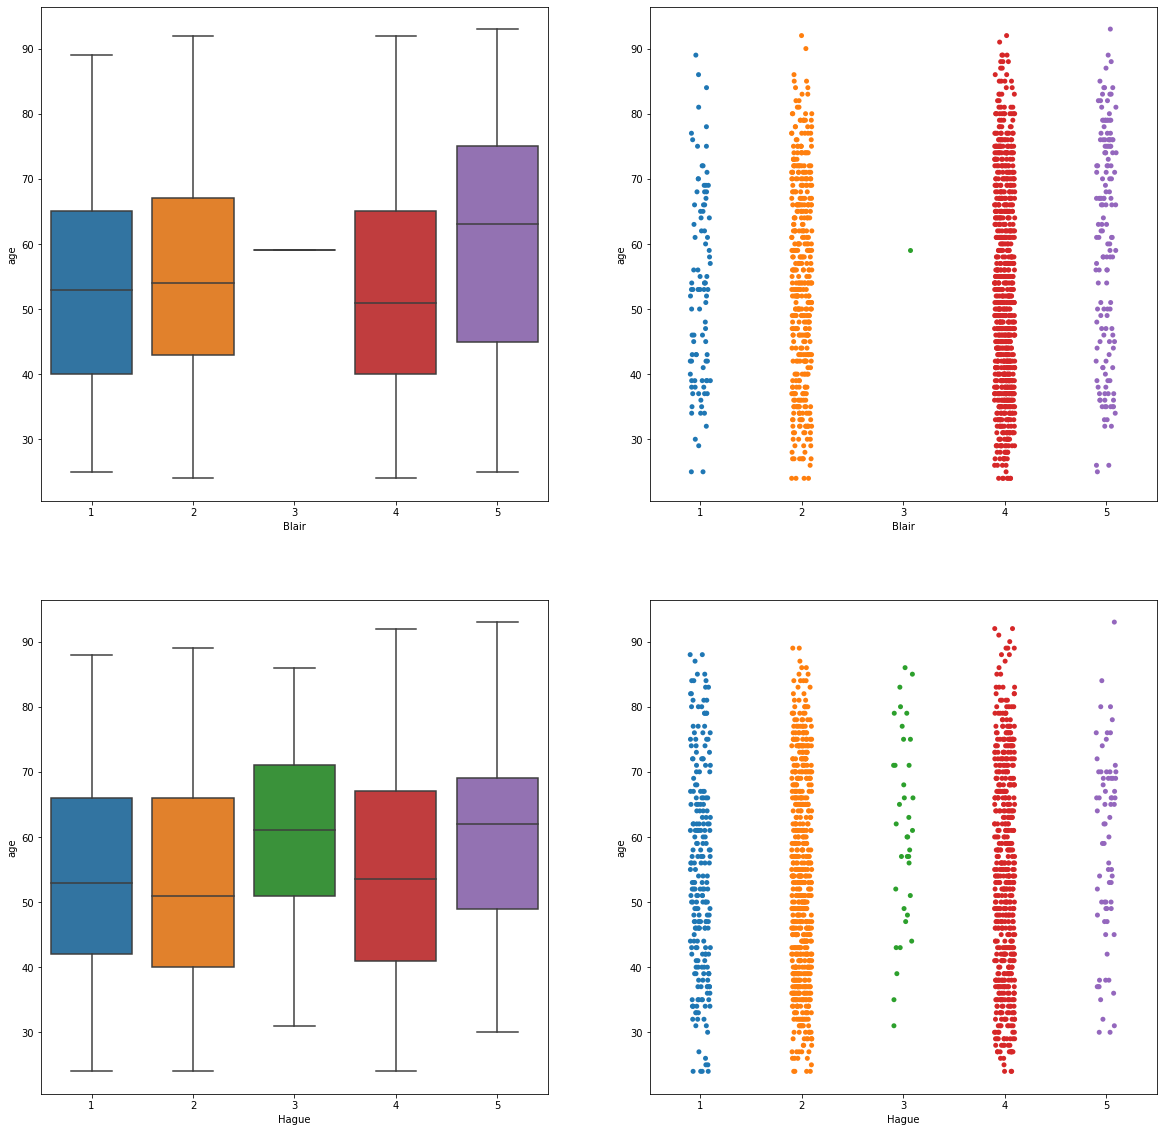

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)

fig.set_size_inches(20,20)

sns.boxplot(data["Blair"],data["age"], ax = axes[0][0])
sns.stripplot(data["Blair"],data["age"], ax = axes[0][1])
sns.boxplot(data["Hague"],data["age"], ax = axes[1][0])
sns.stripplot(data["Hague"],data["age"], ax = axes[1][1])

We can see in both the plots that the distribution in Class 3 is almost null or extremely less

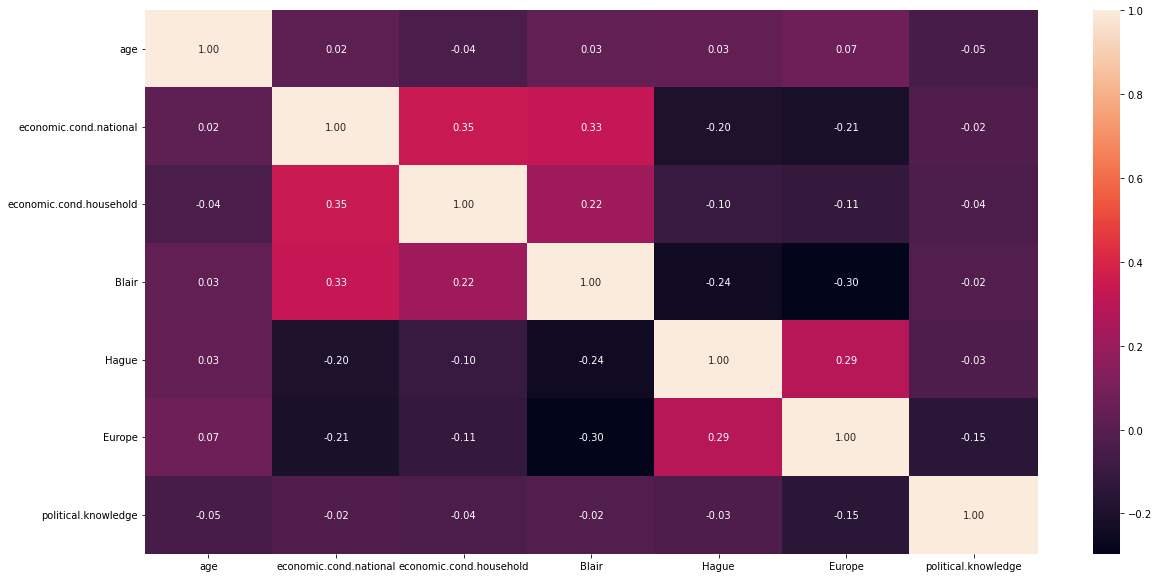

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f');

**Understanding from Heatmap**

- There are very less correlation between the variables
- The highest positive correlation is seen between “economic_cond_national” and “economic_cond_household” (35%) with nearly similar results seen from “Blair” and “economic_cond_national” (33%)
- The highest negative correlation is seen between “Blair” and “Europe” (30%) with nearly similar results seen from “Blair” and “Hague”(24%)
- There is less or no chance of multi_collinearity

#### Checking for Outliers

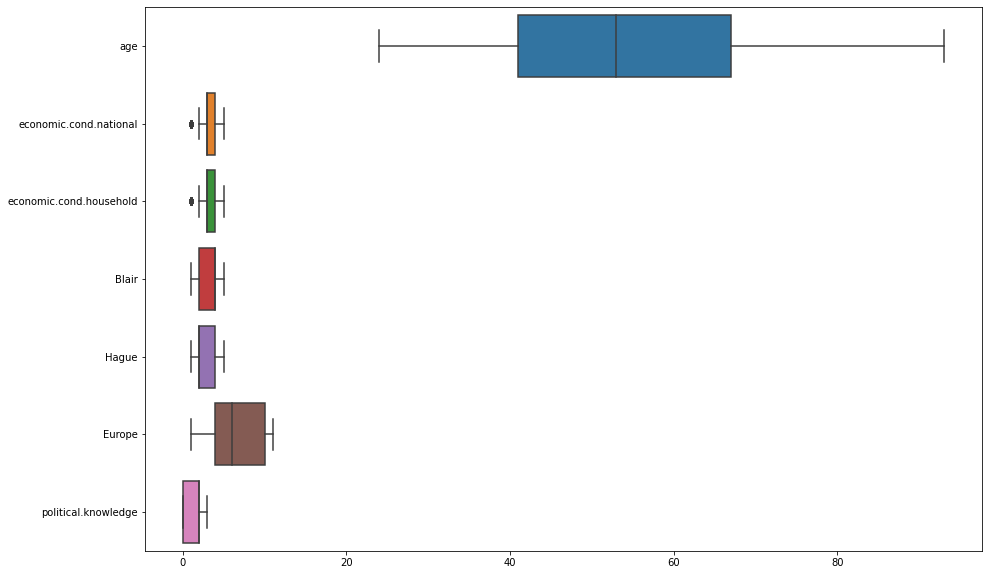

In [11]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=data,orient="h")
plt.show()

In [12]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [13]:
dtypes=data.dtypes[(data.dtypes!= 'object')].index
for column in data[dtypes].columns:
    LR, UR = remove_outlier(data[column])
    data[column] = np.where(data[column] > UR, UR, data[column])
    data[column] = np.where(data[column] < LR, LR, data[column])

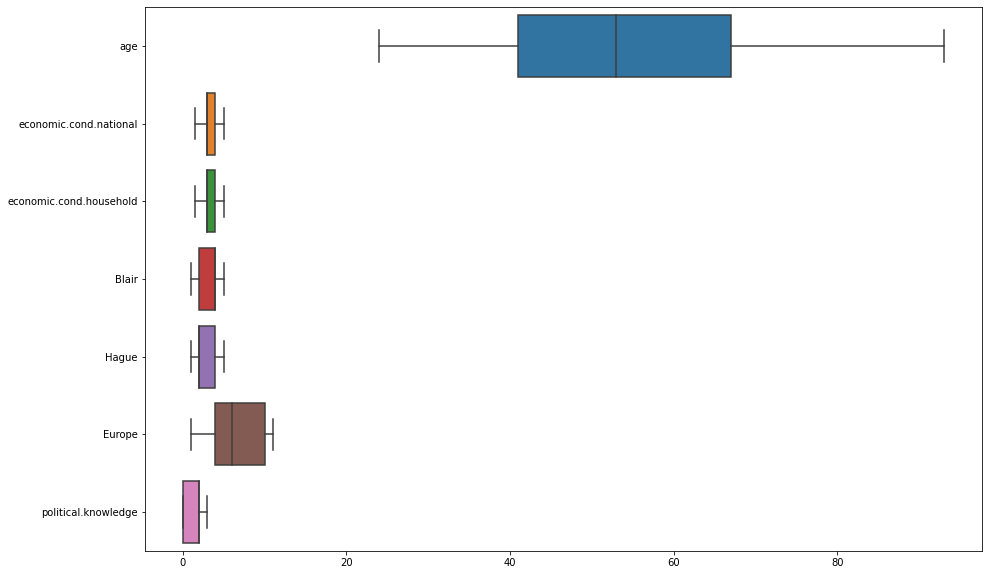

In [14]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=data,orient="h")
plt.show()

#The Ouliers are now treated

In [ ]:
data['age'] = data['age'].astype('int64')
data['economic.cond.national'] = data['economic.cond.national'].astype('int64')
data['economic.cond.household'] = data['economic.cond.household'].astype('int64')
data['Blair'] = data['Blair'].astype('int64')
data['Hague'] = data['Hague'].astype('int64')
data['Europe'] = data['Europe'].astype('int64')
data['political.knowledge'] = data['political.knowledge'].astype('int64')

As we have now analysed and treated our data, let us proceed with Logistic Regression 

#### **LOGISTIC REGRESSION**

Even though we have treated the outliers, we have to scale our data for the optimal performance of the Regression Model as these are scale sensitive

In [ ]:
#Now let us encode the gender for the model
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore

In [ ]:
ord_encoder = OrdinalEncoder(categories=[['Labour',"Conservative"]])
ord_encoder.fit(data[['vote']])
data ['vote'] = ord_encoder.transform(data [['vote']])

In [ ]:
ord_encoder = OrdinalEncoder(categories=[['female',"male"]])
ord_encoder.fit(data[['gender']])
data ['gender'] = ord_encoder.transform(data [['gender']])

In [ ]:
data['vote'] = data['vote'].astype('int64')
data['gender'] = data['gender'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int64
dtypes: int64(9)
memory usage: 107.4 KB


In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = data.copy()
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


Scaling of the data is important since most of the models are sensitive to the scale differences.
- In this dataset, age is only continuous variable and rest of the variables have 1 to 5 .Age variable is only scaled because it is continuous varibale
- The method of scaling performed only on the ‘age’ variable is the Z-score scaling.

In [ ]:
df['age']=df[['age']].apply(zscore)

In [ ]:
#Independent Variables
X=data.drop(["vote"], axis=1)
#Dependent Variable
Y=data[["vote"]]

In [ ]:
X = sm.add_constant(X)

In [ ]:
#Splitting the data into  train and test sets in a 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
#Let us find out the shape of the above split data
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',Y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',Y_test.shape)

The training set for the independent variables: (1067, 9)
The training set for the dependent variable: (1067, 1)
The test set for the independent variables: (458, 9)
The test set for the dependent variable: (458, 1)


In [ ]:
print(X_train.head())

      const  age  economic.cond.national  economic.cond.household  Blair  \
1453    1.0   62                       3                        3      2   
275     1.0   49                       3                        3      2   
1130    1.0   74                       4                        4      4   
1153    1.0   57                       2                        3      4   
1172    1.0   24                       4                        5      4   

      Hague  Europe  political.knowledge  gender  
1453      2      11                    2       0  
275       2       8                    0       0  
1130      4       7                    0       1  
1153      2       6                    2       0  
1172      4       6                    0       1  


In [ ]:
print(X_test.head())

      const  age  economic.cond.national  economic.cond.household  Blair  \
91      1.0   49                       1                        1      2   
1194    1.0   34                       3                        3      2   
201     1.0   51                       2                        2      4   
613     1.0   30                       2                        3      4   
283     1.0   42                       3                        3      2   

      Hague  Europe  political.knowledge  gender  
91        4       8                    3       0  
1194      4       9                    2       1  
201       4       4                    2       1  
613       4       7                    3       1  
283       2       9                    0       1  


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
model = LogisticRegression()
model.fit(X_train, np.ravel(Y_train))

### Predicting Test Data and Model Evaluation

0.8187772925764192
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



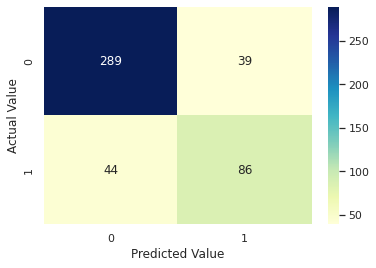

In [ ]:
Y_test_predict_lr = model.predict(X_test)
accuracy_lr_test = model.score(X_test, Y_test)
print(accuracy_lr_test)
print(sns.heatmap(confusion_matrix(Y_test,Y_test_predict_lr),annot=True , cmap='YlGnBu', fmt="2g"));
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
print(classification_report(Y_test, Y_test_predict_lr))

#### Predicting Training Data and Model Evaluation

0.8369259606373008
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



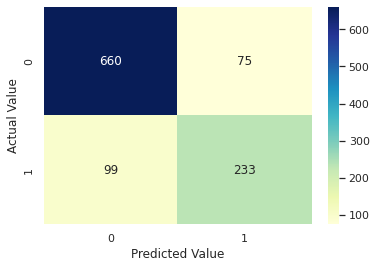

In [ ]:
Y_train_predict_lr = model.predict(X_train)
accuracy_lr_train = model.score(X_train, Y_train)
print(accuracy_lr_train)
print(sns.heatmap(confusion_matrix(Y_train,Y_train_predict_lr),annot=True, cmap='YlGnBu', fmt="2g"));
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
print(classification_report(Y_train, Y_train_predict_lr))

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_train_predict_lr, Y_train))
print(mean_squared_error(model.predict(X_test), Y_test))

0.16307403936269915
0.1812227074235808


In [ ]:
#Probabilties of test data

Y_predict_prob = model.predict_proba(X_test)
pd.DataFrame(Y_predict_prob).head()

,0,1
0,0.047478,0.952522
1,0.258735,0.741265
2,0.671280,0.328720
3,0.513584,0.486416
4,0.860750,0.139250


In [ ]:
#Probabilties of training data

Y_train_predict_prob = model.predict_proba(X_train)
pd.DataFrame(Y_train_predict_prob).head()

,0,1
0,0.353933,0.646067
1,0.839116,0.160884
2,0.816496,0.183504
3,0.867469,0.132531
4,0.960181,0.039819


AUC: 0.889


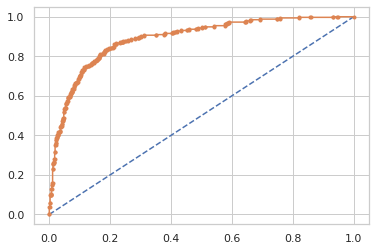

In [ ]:
# AUC and ROC for the training data

probs = model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_lr_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc_lr_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.884


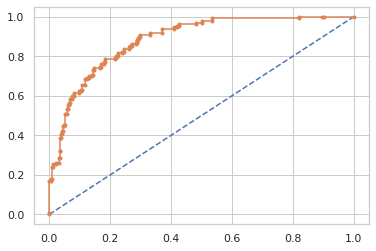

In [ ]:
# AUC and ROC for the test data

probs = model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_lr_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc_lr_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## LINEAR DISCRIMINANT ANALYSIS

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [ ]:
#Building a LDA Model
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,np.ravel(Y_train))

LinearDiscriminantAnalysis()

0.8369259606373008
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



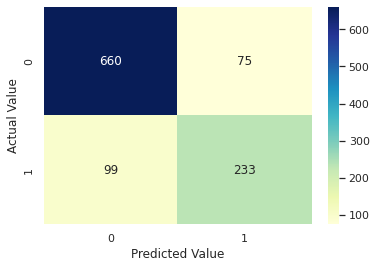

In [ ]:
Y_train_predict_lda = clf.predict(X_train)
accuracy_lda_train = clf.score(X_train, Y_train)
print(accuracy_lda_train)
print(sns.heatmap(confusion_matrix(Y_train,Y_train_predict_lda),annot=True, cmap='YlGnBu', fmt="2g"));
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
print(classification_report(Y_train, Y_train_predict_lda))

0.8187772925764192
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



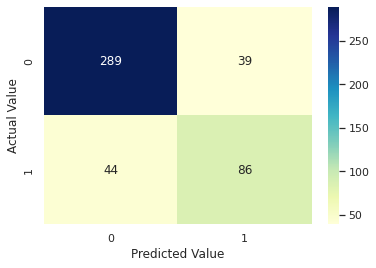

In [ ]:
Y_test_predict_lda = clf.predict(X_test)
accuracy_lda_test = clf.score(X_test, Y_test)
print(accuracy_lda_test)
print(sns.heatmap(confusion_matrix(Y_test,Y_test_predict_lda),annot=True, cmap='YlGnBu', fmt="2g"));
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
print(classification_report(Y_test, Y_test_predict_lda))

AUC: 0.889


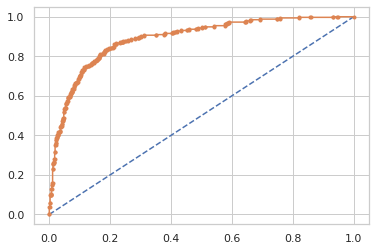

In [ ]:
# AUC and ROC for the training data

probs = clf.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_lda_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc_lda_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.884


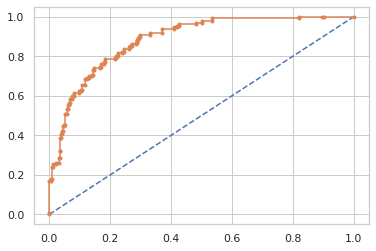

In [ ]:
# AUC and ROC for the test data

probs = clf.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_lda_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc_lda_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
#Probabilties of test data

Y_predict_prob = clf.predict_proba(X_test)
pd.DataFrame(Y_predict_prob).head()

,0,1
0,0.047478,0.952522
1,0.258735,0.741265
2,0.671280,0.328720
3,0.513584,0.486416
4,0.860750,0.139250


In [ ]:
#Probabilties of training data

Y_train_predict_prob = clf.predict_proba(X_train)
pd.DataFrame(Y_train_predict_prob).head()

,0,1
0,0.353933,0.646067
1,0.839116,0.160884
2,0.816496,0.183504
3,0.867469,0.132531
4,0.960181,0.039819


## KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Let us first try KNN Model with 15 neighbours

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train,np.ravel(Y_train))

KNeighborsClassifier(n_neighbors=15)

0.8266166822867854
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       735
           1       0.77      0.64      0.70       332

    accuracy                           0.83      1067
   macro avg       0.81      0.77      0.79      1067
weighted avg       0.82      0.83      0.82      1067



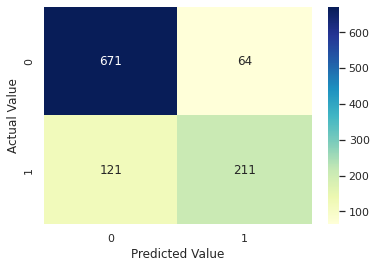

In [ ]:
Y_train_predict_knn = KNN.predict(X_train)
accuracy_knn_train = KNN.score(X_train, Y_train)
print(accuracy_knn_train)
print(sns.heatmap(confusion_matrix(Y_train,Y_train_predict_knn),annot=True, cmap='YlGnBu', fmt="2g"));
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
print(classification_report(Y_train, Y_train_predict_knn))

0.8122270742358079
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       328
           1       0.68      0.65      0.66       130

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458



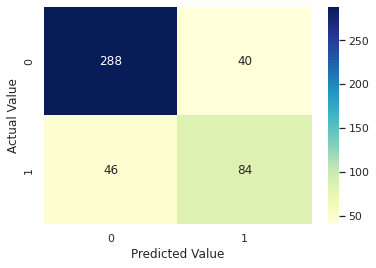

In [ ]:
Y_test_predict_knn = KNN.predict(X_test)
accuracy_knn_test = KNN.score(X_test, Y_test)
print(accuracy_knn_test)
print(sns.heatmap(confusion_matrix(Y_test,Y_test_predict_knn),annot=True, cmap='YlGnBu', fmt="2g"));
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
print(classification_report(Y_test, Y_test_predict_knn))

AUC: 0.895


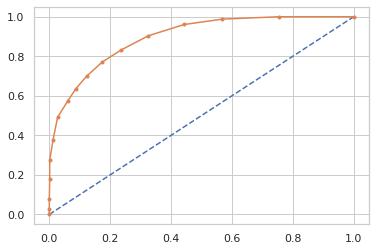

In [ ]:
# AUC and ROC for the training data

probs = KNN.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc_knn_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc_knn_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.870


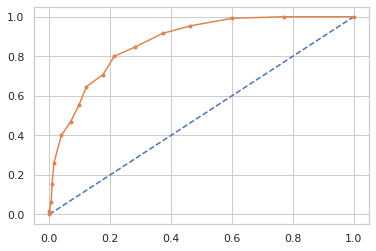

In [ ]:
# AUC and ROC for the test data

probs = KNN.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc_knn_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc_knn_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
#Probabilties of test data

Y_predict_prob = KNN.predict_proba(X_test)
pd.DataFrame(Y_predict_prob).head()

,0,1
0,0.333333,0.666667
1,0.266667,0.733333
2,0.733333,0.266667
3,0.733333,0.266667
4,0.600000,0.400000


In [ ]:
#Probabilties of training data

Y_train_predict_prob = KNN.predict_proba(X_train)
pd.DataFrame(Y_train_predict_prob).head()

,0,1
0,0.266667,0.733333
1,0.733333,0.266667
2,0.600000,0.400000
3,0.866667,0.133333
4,0.733333,0.266667


## NIAVE BAYES MODEL

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, np.ravel(Y_train))

GaussianNB()

### Performance and Prediction of Model on training data set

0.8331771321462043
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.74      0.72      0.73       332

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



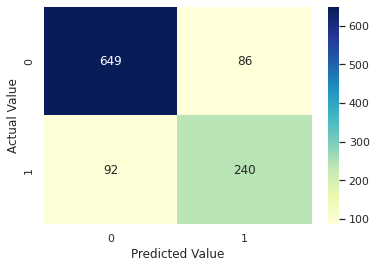

In [ ]:
Y_train_predict_nb = NB_model.predict(X_train)
accuracy_nb_train = NB_model.score(X_train, Y_train)
print(accuracy_nb_train)
print(sns.heatmap(confusion_matrix(Y_train,Y_train_predict_nb),annot=True, cmap='YlGnBu', fmt="2g"));
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
print(classification_report(Y_train, Y_train_predict_nb))

### Performance and Prediction of Model on test data set

0.8253275109170306
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.68      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



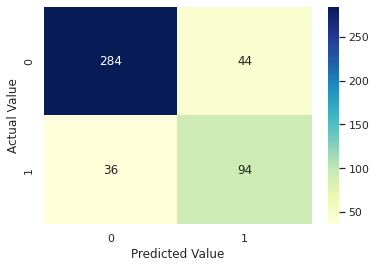

In [ ]:
Y_test_predict_nb = NB_model.predict(X_test)
accuracy_nb_test = NB_model.score(X_test, Y_test)
print(accuracy_nb_test)
print(sns.heatmap(confusion_matrix(Y_test,Y_test_predict_nb),annot=True, cmap='YlGnBu', fmt="2g"));
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
print(classification_report(Y_test, Y_test_predict_nb))

AUC: 0.886


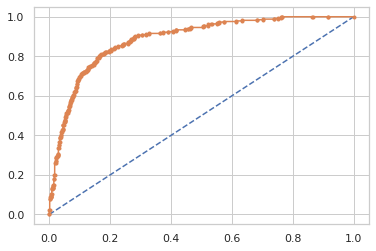

In [ ]:
# AUC and ROC for the training data

probs = NB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc_nb_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc_nb_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.885


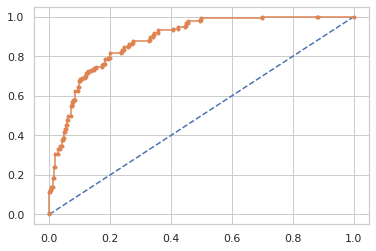

In [ ]:
# AUC and ROC for the test data

probs = NB_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc_nb_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc_nb_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
#Probabilties of training data

Y_train_predict_prob = NB_model.predict_proba(X_train)
pd.DataFrame(Y_train_predict_prob).head()

,0,1
0,0.283257,0.716743
1,0.730736,0.269264
2,0.893465,0.106535
3,0.837115,0.162885
4,0.974474,0.025526


In [ ]:
#Probabilties of test data

Y_predict_prob = NB_model.predict_proba(X_test)
pd.DataFrame(Y_predict_prob).head()

,0,1
0,0.007418,0.992582
1,0.127536,0.872464
2,0.565517,0.434483
3,0.463956,0.536044
4,0.757823,0.242177


## Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Bagging with Random Forest

In [ ]:
RF=RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=30,
                       min_samples_split=50, n_estimators=105)
bag=BaggingClassifier(base_estimator=RF, n_estimators=105,random_state=1)
bag.fit(X_train, np.ravel(Y_train))

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                        max_features=5,
                                                        min_samples_leaf=30,
                                                        min_samples_split=50,
                                                        n_estimators=105),
                  n_estimators=105, random_state=1)

Let us look into the performance and accuracy of the model on the test and train dataset.

In [ ]:
Y_train_predict_bag = bag.predict(X_train)
accuracy_bag_train = bag.score(X_train, Y_train)
accuracy_bag_train

0.831302717900656

In [ ]:
print(classification_report(bag.predict(X_train),Y_train))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       811
           1       0.61      0.80      0.69       256

    accuracy                           0.83      1067
   macro avg       0.77      0.82      0.79      1067
weighted avg       0.85      0.83      0.84      1067



In [ ]:
Y_test_predict_bag = bag.predict(X_test)
accuracy_bag_test = bag.score(X_test, Y_test)
accuracy_bag_test

0.8209606986899564

In [ ]:
print(classification_report(bag.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       346
           1       0.62      0.71      0.66       112

    accuracy                           0.82       458
   macro avg       0.76      0.78      0.77       458
weighted avg       0.83      0.82      0.83       458



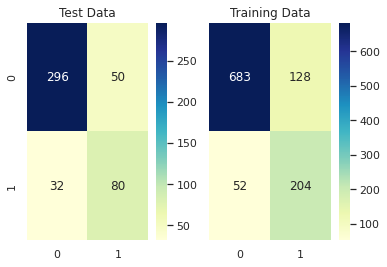

<Figure size 1080x1080 with 0 Axes>

In [ ]:
#Confusion matrix for test and training data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plt.figure(figsize=(15,15))

plot_0 = sns.heatmap((metrics.confusion_matrix(bag.predict(X_test),Y_test)),annot=True , cmap='YlGnBu', fmt="2g",ax=a[0][0]);
a[0][0].set_title('Test Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(bag.predict(X_train),Y_train)),annot=True, cmap='YlGnBu', fmt="2g",ax=a[0][1]);
a[0][1].set_title('Training Data');

AUC: 0.889


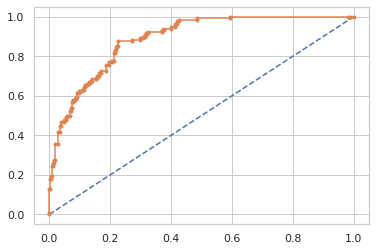

In [ ]:
# AUC and ROC for the test data

probs = bag.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc_bag_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc_bag_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.895


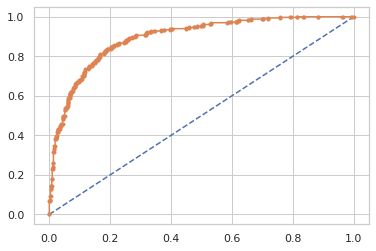

In [ ]:
# AUC and ROC for the training data

probs = bag.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc_bag_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc_bag_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
#Probabilties of test data

Y_predict_prob = bag.predict_proba(X_test)
pd.DataFrame(Y_predict_prob).head()

,0,1
0,0.249572,0.750428
1,0.241571,0.758429
2,0.753575,0.246425
3,0.635087,0.364913
4,0.679403,0.320597


In [ ]:
#Probabilties of training data

Y_train_predict_prob = bag.predict_proba(X_train)
pd.DataFrame(Y_train_predict_prob).head()

,0,1
0,0.548701,0.451299
1,0.683242,0.316758
2,0.658332,0.341668
3,0.859657,0.140343
4,0.807647,0.192353


## Ada Boosting Model

In [ ]:
ada = AdaBoostClassifier(n_estimators=100,random_state=1, learning_rate=1.0, algorithm='SAMME.R')
ada.fit(X_train,np.ravel(Y_train))

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
Y_train_predict_ada = ada.predict(X_train)
accuracy_ada_train = ada.score(X_train, Y_train)
accuracy_ada_train

0.8472352389878163

In [ ]:
print(classification_report(ada.predict(X_train),Y_train))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       760
           1       0.72      0.78      0.74       307

    accuracy                           0.85      1067
   macro avg       0.81      0.83      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [ ]:
Y_test_predict_ada = ada.predict(X_test)
accuracy_ada_test = ada.score(X_test, Y_test)
accuracy_ada_test

0.8187772925764192

In [ ]:
print(classification_report(ada.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       325
           1       0.69      0.68      0.68       133

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [ ]:
#Probabilties of training data

Y_train_predict_prob = ada.predict_proba(X_train)
pd.DataFrame(Y_train_predict_prob).head()

,0,1
0,0.497384,0.502616
1,0.502240,0.497760
2,0.502516,0.497484
3,0.503762,0.496238
4,0.500048,0.499952


In [ ]:
#Probabilties of test data

Y_predict_prob = ada.predict_proba(X_test)
pd.DataFrame(Y_predict_prob).head()

,0,1
0,0.495352,0.504648
1,0.497092,0.502908
2,0.500749,0.499251
3,0.499423,0.500577
4,0.504297,0.495703


AUC: 0.879


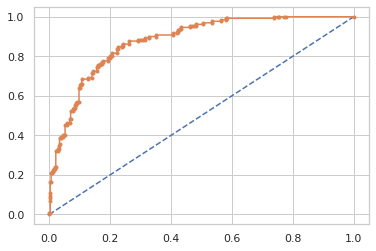

In [ ]:
# AUC and ROC for the test data

probs = ada.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc_ada_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc_ada_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.913


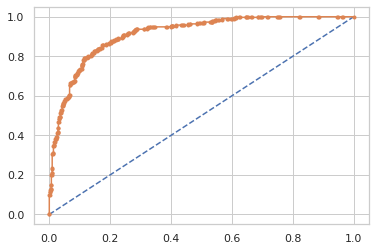

In [ ]:
# AUC and ROC for the training data

probs = ada.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc_ada_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc_ada_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

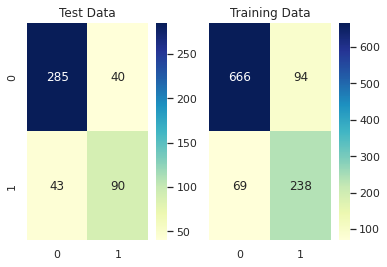

<Figure size 1080x1080 with 0 Axes>

In [ ]:
#Confusion matrix for test and training data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plt.figure(figsize=(15,15))

plot_0 = sns.heatmap((metrics.confusion_matrix(ada.predict(X_test),Y_test)),annot=True , cmap='YlGnBu', fmt="2g",ax=a[0][0]);
a[0][0].set_title('Test Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(ada.predict(X_train),Y_train)),annot=True, cmap='YlGnBu', fmt="2g",ax=a[0][1]);
a[0][1].set_title('Training Data');

### Gradient Boosting Model

In [ ]:
gb = GradientBoostingClassifier(criterion = 'friedman_mse',loss='exponential',max_features=5,
                                min_samples_split=50,n_estimators=101,random_state=1)
gb = gb.fit(X_train, np.ravel(Y_train))

In [ ]:
Y_test_predict_gb = gb.predict(X_test)
accuracy_gb_test = gb.score(X_test, Y_test)
accuracy_gb_test

0.8209606986899564

In [ ]:
print(classification_report(gb.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       316
           1       0.73      0.67      0.70       142

    accuracy                           0.82       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.82      0.82      0.82       458



In [ ]:
#Probabilties of test data

Y_predict_prob = gb.predict_proba(X_test)
pd.DataFrame(Y_predict_prob).head()

,0,1
0,0.116244,0.883756
1,0.130473,0.869527
2,0.783760,0.216240
3,0.671613,0.328387
4,0.834392,0.165608


AUC: 0.899


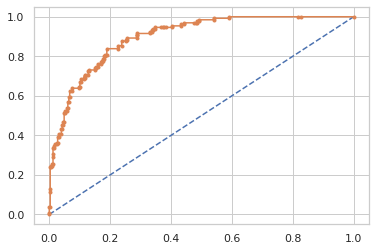

In [ ]:
# AUC and ROC for the test data

probs = gb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc_gb_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc_gb_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
Y_train_predict_gb = gb.predict(X_train)
accuracy_gb_train = gb.score(X_train, Y_train)
accuracy_gb_train

0.8687910028116214

In [ ]:
print(classification_report(gb.predict(X_train),Y_train))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       763
           1       0.75      0.82      0.78       304

    accuracy                           0.87      1067
   macro avg       0.84      0.85      0.84      1067
weighted avg       0.87      0.87      0.87      1067



In [ ]:
#Probabilties of training data

Y_train_predict_prob = gb.predict_proba(X_train)
pd.DataFrame(Y_train_predict_prob).head()

,0,1
0,0.292406,0.707594
1,0.718944,0.281056
2,0.846984,0.153016
3,0.813718,0.186282
4,0.599406,0.400594


AUC: 0.945


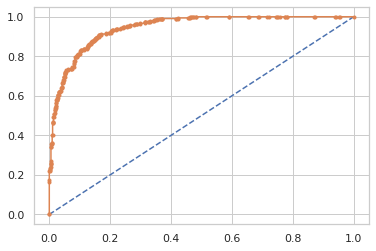

In [ ]:
# AUC and ROC for the training data

probs = gb.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc_gb_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc_gb_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

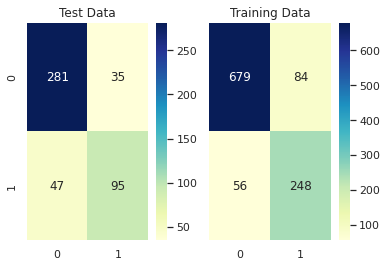

<Figure size 1080x1080 with 0 Axes>

In [ ]:
#Confusion matrix for test and training data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plt.figure(figsize=(15,15))

plot_0 = sns.heatmap((metrics.confusion_matrix(gb.predict(X_test),Y_test)),annot=True , cmap='YlGnBu', fmt="2g",ax=a[0][0]);
a[0][0].set_title('Test Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(gb.predict(X_train),Y_train)),annot=True, cmap='YlGnBu', fmt="2g",ax=a[0][1]);
a[0][1].set_title('Training Data');

### Now let us make a table from all the above analysis to compare the performance of each model

In [ ]:
metrics=classification_report(Y_train, Y_train_predict_lr,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)

LR_train_precision  0.76
LR_train_recall  0.7
LR_train_f1  0.73


In [ ]:
metrics=classification_report(Y_test, Y_test_predict_lr,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)

LR_test_precision  0.69
LR_test_recall  0.66
LR_test_f1  0.67


In [ ]:
metrics=classification_report(Y_train, Y_train_predict_lda, output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lda)
print ('LDA_train_recall ',train_recall_lda)
print ('LDA_train_f1 ',train_f1_lda)

LDA_train_precision  0.76
LDA_train_recall  0.7
LDA_train_f1  0.73


In [ ]:
metrics=classification_report(Y_test, Y_test_predict_lda, output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_lda)
print ('LDA_test_recall ',test_recall_lda)
print ('LDA_test_f1 ',test_f1_lda)

LDA_test_precision  0.69
LDA_test_recall  0.66
LDA_test_f1  0.67


In [ ]:
metrics=classification_report(Y_train, Y_train_predict_knn, output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_knn=round(df.loc["1"][0],2)
train_recall_knn=round(df.loc["1"][1],2)
train_f1_knn=round(df.loc["1"][2],2)
print ('KNN_train_precision ',train_precision_knn)
print ('KNN_train_recall ',train_recall_knn)
print ('KNN_train_f1 ',train_f1_knn)

KNN_train_precision  0.77
KNN_train_recall  0.64
KNN_train_f1  0.7


In [ ]:
metrics=classification_report(Y_test, Y_test_predict_knn, output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_knn=round(df.loc["1"][0],2)
test_recall_knn=round(df.loc["1"][1],2)
test_f1_knn=round(df.loc["1"][2],2)
print ('KNN_test_precision ',test_precision_knn)
print ('KNN_test_recall ',test_recall_knn)
print ('KNN_test_f1 ',test_f1_knn)

KNN_test_precision  0.69
KNN_test_recall  0.66
KNN_test_f1  0.67


In [ ]:
metrics=classification_report(Y_train, Y_train_predict_nb, output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_nb=round(df.loc["1"][0],2)
train_recall_nb=round(df.loc["1"][1],2)
train_f1_nb=round(df.loc["1"][2],2)
print ('NB_train_precision ',train_precision_nb)
print ('NB_train_recall ',train_recall_nb)
print ('NB_train_f1 ',train_f1_nb)

NB_train_precision  0.74
NB_train_recall  0.72
NB_train_f1  0.73


In [ ]:
metrics=classification_report(Y_test, Y_test_predict_nb, output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_nb=round(df.loc["1"][0],2)
test_recall_nb=round(df.loc["1"][1],2)
test_f1_nb=round(df.loc["1"][2],2)
print ('NB_test_precision ',test_precision_nb)
print ('NB_test_recall ',test_recall_nb)
print ('NB_test_f1 ',test_f1_nb)

NB_test_precision  0.68
NB_test_recall  0.72
NB_test_f1  0.7


In [ ]:
metrics=classification_report(Y_train, Y_train_predict_bag, output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_bag=round(df.loc["1"][0],2)
train_recall_bag=round(df.loc["1"][1],2)
train_f1_bag=round(df.loc["1"][2],2)
print ('BAG_train_precision ',train_precision_bag)
print ('BAG_train_recall ',train_recall_bag)
print ('BAG_train_f1 ',train_f1_bag)

BAG_train_precision  0.8
BAG_train_recall  0.61
BAG_train_f1  0.69


In [ ]:
metrics=classification_report(Y_test, Y_test_predict_bag, output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_bag=round(df.loc["1"][0],2)
test_recall_bag=round(df.loc["1"][1],2)
test_f1_bag=round(df.loc["1"][2],2)
print ('BAG_test_precision ',test_precision_bag)
print ('BAG_test_recall ',test_recall_bag)
print ('BAG_test_f1 ',test_f1_bag)

BAG_test_precision  0.71
BAG_test_recall  0.62
BAG_test_f1  0.66


In [ ]:
metrics=classification_report(Y_train, Y_train_predict_ada, output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_ada=round(df.loc["1"][0],2)
train_recall_ada=round(df.loc["1"][1],2)
train_f1_ada=round(df.loc["1"][2],2)
print ('ADA_train_precision ',train_precision_ada)
print ('ADA_train_recall ',train_recall_ada)
print ('ADA_train_f1 ',train_f1_ada)

ADA_train_precision  0.78
ADA_train_recall  0.72
ADA_train_f1  0.74


In [ ]:
metrics=classification_report(Y_test, Y_test_predict_ada, output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_ada=round(df.loc["1"][0],2)
test_recall_ada=round(df.loc["1"][1],2)
test_f1_ada=round(df.loc["1"][2],2)
print ('ADA_test_precision ',test_precision_ada)
print ('ADA_test_recall ',test_recall_ada)
print ('ADA_test_f1 ',test_f1_ada)

ADA_test_precision  0.68
ADA_test_recall  0.69
ADA_test_f1  0.68


In [ ]:
metrics=classification_report(Y_train, Y_train_predict_gb, output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_gb=round(df.loc["1"][0],2)
train_recall_gb=round(df.loc["1"][1],2)
train_f1_gb=round(df.loc["1"][2],2)
print ('GB_train_precision ',train_precision_gb)
print ('GB_train_recall ',train_recall_gb)
print ('GB_train_f1 ',train_f1_gb)

GB_train_precision  0.82
GB_train_recall  0.75
GB_train_f1  0.78


In [ ]:
metrics=classification_report(Y_test, Y_test_predict_gb, output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_gb=round(df.loc["1"][0],2)
test_recall_gb=round(df.loc["1"][1],2)
test_f1_gb=round(df.loc["1"][2],2)
print ('GB_test_precision ',test_precision_gb)
print ('GB_test_recall ',test_recall_gb)
print ('GB_test_f1 ',test_f1_gb)

GB_test_precision  0.67
GB_test_recall  0.73
GB_test_f1  0.7


In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_lr_train,auc_lr_train,train_recall_lr,train_precision_lr,train_f1_lr],
        'LR Test':[accuracy_lr_test,auc_lr_test,test_recall_lr,test_precision_lr,test_f1_lr],
        'LDA Train':[accuracy_lda_train,auc_lda_train,train_recall_lda,train_precision_lda,train_f1_lda],
        'LDA Test':[accuracy_lda_test,auc_lda_test,test_recall_lda,test_precision_lda,test_f1_lda],
        'KNN Train':[accuracy_knn_train,auc_knn_train,train_recall_knn,train_precision_knn,train_f1_knn],
        'KNN Test':[accuracy_knn_test,auc_knn_test,test_recall_knn,test_precision_knn,test_f1_knn],
        'NB Train':[accuracy_nb_train,auc_nb_train,train_recall_nb,train_precision_nb,train_f1_nb],
        'NB Test':[accuracy_nb_test,auc_nb_test,test_recall_nb,test_precision_nb,test_f1_nb],
        'BAGGING Train':[accuracy_bag_train ,auc_bag_train,train_recall_bag,train_precision_bag,train_f1_bag],
        'BAGGING Test':[accuracy_bag_test,auc_bag_test,test_recall_bag,test_precision_bag,test_f1_bag],
        'ADA Train':[accuracy_ada_train,auc_ada_train,train_recall_ada,train_precision_ada,train_f1_ada],
        'ADA Test':[accuracy_ada_test,auc_ada_test,test_recall_ada,test_precision_ada,test_f1_ada],
        'Gradient Train':[accuracy_gb_train,auc_gb_train,train_recall_gb,train_precision_gb,train_f1_gb],
        'Gradient Test':[accuracy_gb_test,auc_gb_test,test_recall_gb,test_precision_gb,test_f1_gb]},index=index)   
                     
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,BAGGING Train,BAGGING Test,ADA Train,ADA Test,Gradient Train,Gradient Test
Accuracy,0.84,0.82,0.84,0.82,0.83,0.81,0.83,0.83,0.83,0.82,0.85,0.82,0.87,0.82
AUC,0.89,0.88,0.89,0.88,0.90,0.87,0.89,0.88,0.89,0.89,0.91,0.88,0.94,0.90
Recall,0.66,0.66,0.72,0.66,0.64,0.66,0.72,0.72,0.61,0.62,0.72,0.69,0.75,0.73
Precision,0.69,0.69,0.74,0.69,0.77,0.69,0.74,0.68,0.80,0.71,0.78,0.68,0.82,0.67
F1 Score,0.67,0.67,0.73,0.67,0.70,0.67,0.73,0.70,0.69,0.66,0.74,0.68,0.78,0.70


# Problem 02
# Text Analytics

### First lets download the given list of speeches of the Presidents of the United States of America

In [ ]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [ ]:
Roosevelt_Raw = inaugural.raw('1941-Roosevelt.txt')
Kennedy_Raw = inaugural.raw('1961-Kennedy.txt')
Nixon_Raw =inaugural.raw('1973-Nixon.txt')

In [ ]:
print("The number of characters in Roosevelt speech are:",len(Roosevelt_Raw))
print("The number of characters in Kennedy speech are:",len(Kennedy_Raw))
print("The number of characters in Nixon speech are:",len(Nixon_Raw))

The number of characters in Roosevelt speech are: 7571
The number of characters in Kennedy speech are: 7618
The number of characters in Nixon speech are: 9991


In [ ]:
Roosevelt_words = inaugural.words('1941-Roosevelt.txt')
Kennedy_words = inaugural.words('1961-Kennedy.txt')
Nixon_words =inaugural.words('1973-Nixon.txt')

In [ ]:
print("The number of words in Roosevelt speech are:",len(Roosevelt_words))
print("The number of words in Kennedy speech are:",len(Kennedy_words))
print("The number of words in Nixon speech are:",len(Nixon_words))

The number of words in Roosevelt speech are: 1536
The number of words in Kennedy speech are: 1546
The number of words in Nixon speech are: 2028


In [ ]:
print("The number of sentences in Roosevelt speech are:",len(inaugural.sents('1941-Roosevelt.txt')))
print("The number of sentences in Kennedy speech are:",len(inaugural.sents('1961-Kennedy.txt')))
print("The number of sentences in Nixon speech are:",len(inaugural.sents('1973-Nixon.txt')))

The number of sentences in Roosevelt speech are: 68
The number of sentences in Kennedy speech are: 52
The number of sentences in Nixon speech are: 69


### Since now we know the number of character, words and sentences in the 3 speeches, let us look for some commomly used words or most used 15 words

In [ ]:
print("Most common words in Roosevelt speech:",nltk.FreqDist(Roosevelt_words).most_common(15))

Most common words in Roosevelt speech: [('the', 104), ('of', 81), (',', 77), ('.', 67), ('and', 44), ('to', 35), ('in', 30), ('a', 29), ('--', 25), ('is', 24), ('that', 22), ('we', 22), ('it', 15), ('our', 14), ('It', 13)]


In [ ]:
print("Most common words in Kennedy speech:",nltk.FreqDist(Kennedy_words).most_common(15))

Most common words in Kennedy speech: [(',', 85), ('the', 83), ('of', 65), ('.', 51), ('to', 38), ('and', 37), ('a', 29), ('we', 27), ('--', 25), ('in', 24), ('our', 21), ('that', 20), ('not', 19), ('for', 13), ('us', 12)]


In [ ]:
print("Most common words in Nixon speech:",nltk.FreqDist(Nixon_words).most_common(15))

Most common words in Nixon speech: [(',', 96), ('the', 80), ('.', 68), ('of', 68), ('to', 65), ('in', 54), ('and', 47), ('we', 38), ('a', 34), ('that', 32), ('for', 32), ('our', 31), ('us', 26), ('America', 21), ('as', 20)]


In [ ]:
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string
st=SnowballStemmer('english')

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Removing stopwords and stemming in Roosevelt Speech
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stopwords.extend(["--"]) 
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

clean_stem = [st.stem(word) for word in all_words_clean]

Roosevelt_words_freq = nltk.FreqDist(clean_stem)

word_features1 = [item[0] for item in Roosevelt_words_freq.most_common(50)]
word_features1 #most used words after removing stopwords

['nation',
 'know',
 'peopl',
 'spirit',
 'life',
 'democraci',
 'us',
 'america',
 'live',
 'year',
 'human',
 'freedom',
 'measur',
 'men',
 'govern',
 'new',
 'bodi',
 'mind',
 'speak',
 'day',
 'state',
 'american',
 'must',
 'someth',
 'faith',
 'unit',
 'task',
 'preserv',
 'within',
 'histori',
 'three',
 'form',
 'futur',
 'seem',
 'hope',
 'understand',
 'thing',
 'free',
 'alon',
 'still',
 'everi',
 'contin',
 'like',
 'person',
 'world',
 'sacr',
 'word',
 'came',
 'land',
 'first']

In [ ]:
#Removing stopwords and stemming in Kennedy Speech
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stopwords.extend(["--"]) 
all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

clean_stem = [st.stem(word) for word in all_words_clean]

Kennedy_words_freq = nltk.FreqDist(clean_stem)

word_features2 = [item[0] for item in Kennedy_words_freq.most_common(50)]
word_features2 #most used words after removing stopwords

['let',
 'us',
 'power',
 'world',
 'nation',
 'side',
 'new',
 'pledg',
 'ask',
 'citizen',
 'peac',
 'shall',
 'free',
 'final',
 'presid',
 'fellow',
 'freedom',
 'begin',
 'man',
 'hand',
 'human',
 'right',
 'first',
 'generat',
 'american',
 'war',
 'alway',
 'know',
 'support',
 'unit',
 'cannot',
 'hope',
 'help',
 'weak',
 'arm',
 'countri',
 'call',
 'today',
 'well',
 'god',
 'form',
 'poverti',
 'life',
 'globe',
 'state',
 'dare',
 'word',
 'go',
 'friend',
 'bear']

In [ ]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) 

all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]


Nixon_words_freq = nltk.FreqDist(clean_stem)

word_features3 = [item[0] for item in Nixon_words_freq.most_common(50)]
word_features3

['us',
 'let',
 'america',
 'peac',
 'world',
 'respons',
 'new',
 'nation',
 'great',
 'govern',
 'year',
 'home',
 'abroad',
 'make',
 'togeth',
 'shall',
 'time',
 'polici',
 'role',
 'right',
 'everi',
 'histori',
 'better',
 'come',
 'respect',
 'peopl',
 'live',
 'help',
 'four',
 'war',
 'today',
 'era',
 'bold',
 'progress',
 'other',
 'build',
 'act',
 'challeng',
 'one',
 'share',
 'meet',
 'promis',
 'long',
 'work',
 'preserv',
 'freedom',
 'place',
 'system',
 'god',
 'way']

###  The top three words in his inaugural address for each president  (after removing the stopwords)

In [ ]:
print("Top three words in Roosevelt's speech(after removing the stopwords):",nltk.FreqDist(Roosevelt_words_freq).most_common(3))

Top three words in Roosevelt's speech(after removing the stopwords): [('nation', 17), ('know', 10), ('peopl', 9)]


In [ ]:
print("Top three words in Kennedy's speech(after removing the stopwords):",nltk.FreqDist(Kennedy_words_freq).most_common(3))

Top three words in Kennedy's speech(after removing the stopwords): [('let', 16), ('us', 12), ('power', 9)]


In [ ]:
print("Top three words in Nixon's speech(after removing the stopwords):",nltk.FreqDist(Nixon_words_freq).most_common(3))

Top three words in Nixon's speech(after removing the stopwords): [('us', 26), ('let', 22), ('america', 21)]


### Word Cloud

In [ ]:
#First a dataframe is to be created for all 3 speeches separately
#To remove stop words (extended list as above) from the corpus 
#Then import WordCloud and plot the visual representation of the Speech

In [ ]:
Roosevelt_df = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})

In [ ]:
stop_words = list(nltk.corpus.stopwords.words('english') )
stop_words.extend(["--"])

In [ ]:
corpus = Roosevelt_df['Roosevelt'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0    On national day inauguration since 1789, peopl...
Name: Roosevelt, dtype: object

In [ ]:
wc1 = ' '.join(corpus)

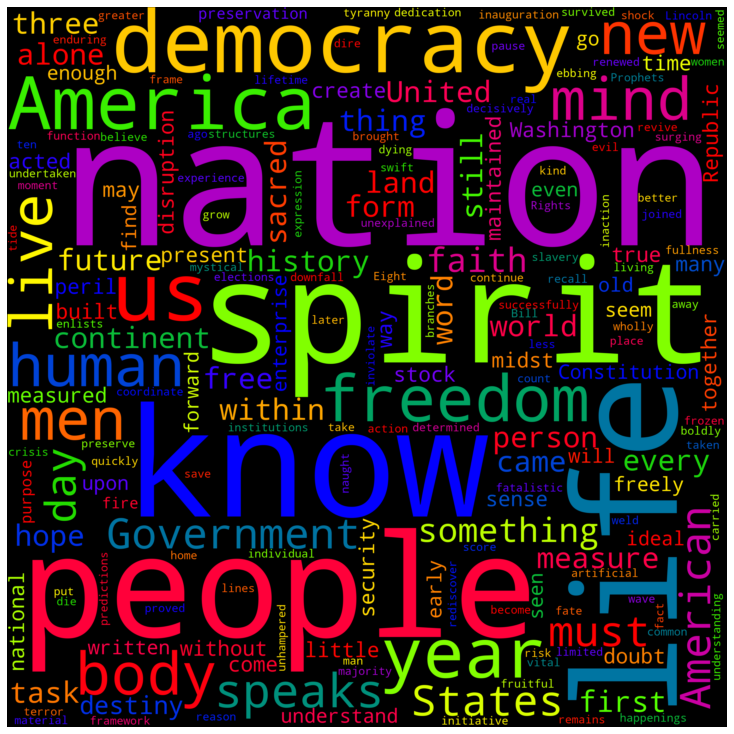

In [ ]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                colormap='prism_r',
                min_font_size = 10, random_state=100, collocations=False).generate(wc1) 
#Visual Representation                     
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
Kennedy_df =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})

In [ ]:
stop_words = list(nltk.corpus.stopwords.words('english') )
stop_words.extend(["--"])

In [ ]:
corpus1 = Kennedy_df['Kennedy'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus1

0    Vice President Johnson, Mr. Speaker, Mr. Chief...
Name: Kennedy, dtype: object

In [ ]:
wc2 = ' '.join(corpus1)

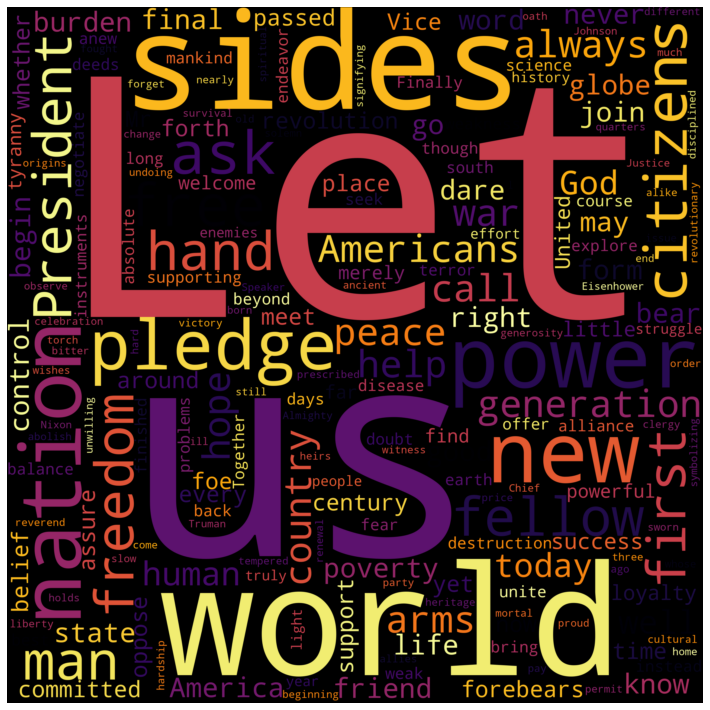

In [ ]:
# Word Cloud 
wordcloud1 = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                colormap='inferno',
                min_font_size = 10, random_state=100, collocations=False).generate(wc2) 
#Visual Representation                     
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud1, interpolation='bilinear') 
plt.axis("off")
plt.tight_layout(pad = 1) 
plt.show()

In [ ]:
Nixon_df =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

In [ ]:
stop_words = list(nltk.corpus.stopwords.words('english') )
stop_words.extend(["--"])

In [ ]:
corpus2 = Nixon_df['Nixon'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus2

0    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Nixon, dtype: object

In [ ]:
wc3 = ' '.join(corpus2)

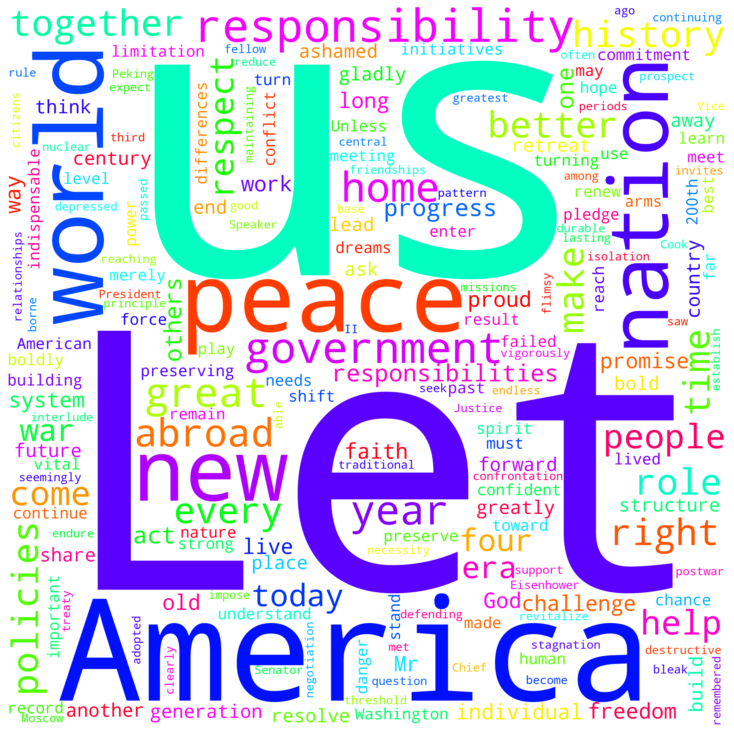

In [ ]:
# Word Cloud 
wordcloud2 = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                colormap='hsv_r',
                min_font_size = 10, random_state=100, collocations=False).generate(wc3) 
#Visual Representation                     
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud2, interpolation='bilinear') 
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()